# Group Assignment, Individual Component
## Demographics based on Race in San Francisco

Demographic tables were pulled from the San Francisco Census Data, based on 2021. Shapefiles were pulled from Data SF. These data were merged to visually map demographics based on race across San Francisco. 

by DaYoung Lee

### 1. Importing the Data

In [48]:
# import the pandas and geopandas libraries, which will allow the data to be analyzed 
import pandas as pd
import geopandas as gpd

In [49]:
#open the data
df = pd.read_csv('Data/2021_SFCensus.csv')

### 2. Analyze the data

In [50]:
#.shape allows us to see the dimensions of the dataframe that we are working with 
df.shape

(244, 850)

In [51]:
#.head allows us to confirm that the data is outputting correctly
df.head()

,GEO_ID,NAME,S0601_C01_001E,S0601_C01_001EA,S0601_C01_001M,S0601_C01_001MA,S0601_C01_002E,S0601_C01_002EA,S0601_C01_002M,S0601_C01_002MA,S0601_C01_003E,S0601_C01_003EA,S0601_C01_003M,S0601_C01_003MA,S0601_C01_004E,S0601_C01_004EA,S0601_C01_004M,S0601_C01_004MA,S0601_C01_005E,S0601_C01_005EA,S0601_C01_005M,S0601_C01_005MA,S0601_C01_006E,S0601_C01_006M,S0601_C01_006MA,S0601_C01_006EA,S0601_C01_007E,S0601_C01_007EA,S0601_C01_007M,S0601_C01_007MA,S0601_C01_008E,S0601_C01_008EA,S0601_C01_008M,S0601_C01_008MA,S0601_C01_009E,S0601_C01_009EA,S0601_C01_009M,S0601_C01_009MA,S0601_C01_010E,S0601_C01_010EA,S0601_C01_010M,S0601_C01_010MA,S0601_C01_011E,S0601_C01_011EA,S0601_C01_011M,S0601_C01_011MA,S0601_C01_012E,S0601_C01_012M,S0601_C01_012MA,S0601_C01_012EA,S0601_C01_013E,S0601_C01_013M,S0601_C01_013MA,S0601_C01_013EA,S0601_C01_014E,S0601_C01_014M,S0601_C01_014MA,S0601_C01_014EA,S0601_C01_015E,S0601_C01_015M,S0601_C01_015MA,S0601_C01_015EA,S0601_C01_016E,S0601_C01_016M,S0601_C01_016MA,S0601_C01_016EA,S0601_C01_017E,S0601_C01_017EA,S0601_C01_017M,S0601_C01_017MA,S0601_C01_018E,S0601_C01_018M,S0601_C01_018MA,S0601_C01_018EA,S0601_C01_019E,S0601_C01_019M,S0601_C01_019MA,S0601_C01_019EA,S0601_C01_020E,S0601_C01_020M,S0601_C01_020MA,S0601_C01_020EA,S0601_C01_021E,S0601_C01_021M,S0601_C01_021MA,S0601_C01_021EA,S0601_C01_022E,S0601_C01_022M,S0601_C01_022MA,S0601_C01_022EA,S0601_C01_023E,S0601_C01_023EA,S0601_C01_023M,S0601_C01_023MA,S0601_C01_024E,S0601_C01_024EA,S0601_C01_024M,S0601_C01_024MA,S0601_C01_025E,S0601_C01_025EA,S0601_C01_025M,S0601_C01_025MA,S0601_C01_026E,S0601_C01_026EA,S0601_C01_026M,S0601_C01_026MA,S0601_C01_027E,S0601_C01_027EA,S0601_C01_027M,S0601_C01_027MA,S0601_C01_028E,S0601_C01_028EA,S0601_C01_028M,S0601_C01_028MA,S0601_C01_029E,S0601_C01_029EA,S0601_C01_029M,S0601_C01_029MA,S0601_C01_030E,S0601_C01_030EA,S0601_C01_030M,S0601_C01_030MA,S0601_C01_031E,S0601_C01_031EA,S0601_C01_031M,S0601_C01_031MA,S0601_C01_032E,S0601_C01_032EA,S0601_C01_032M,S0601_C01_032MA,S0601_C01_033E,S0601_C01_033M,S0601_C01_033MA,S0601_C01_033EA,S0601_C01_034E,S0601_C01_034EA,S0601_C01_034M,S0601_C01_034MA,S0601_C01_035E,S0601_C01_035EA,S0601_C01_035M,S0601_C01_035MA,S0601_C01_036E,S0601_C01_036EA,S0601_C01_036M,S0601_C01_036MA,S0601_C01_037E,S0601_C01_037EA,S0601_C01_037M,S0601_C01_037MA,S0601_C01_038E,S0601_C01_038M,S0601_C01_038MA,S0601_C01_038EA,S0601_C01_039E,S0601_C01_039M,S0601_C01_039MA,S0601_C01_039EA,S0601_C01_040E,S0601_C01_040M,S0601_C01_040MA,S0601_C01_040EA,S0601_C01_041E,S0601_C01_041EA,S0601_C01_041M,S0601_C01_041MA,S0601_C01_042E,S0601_C01_042M,S0601_C01_042MA,S0601_C01_042EA,S0601_C01_043E,S0601_C01_043EA,S0601_C01_043M,S0601_C01_043MA,S0601_C01_044E,S0601_C01_044EA,S0601_C01_044M,S0601_C01_044MA,S0601_C01_045E,S0601_C01_045EA,S0601_C01_045M,S0601_C01_045MA,S0601_C01_046E,S0601_C01_046M,S0601_C01_046MA,S0601_C01_046EA,S0601_C01_047E,S0601_C01_047EA,S0601_C01_047M,S0601_C01_047MA,S0601_C01_048E,S0601_C01_048EA,S0601_C01_048M,S0601_C01_048MA,S0601_C01_049E,S0601_C01_049EA,S0601_C01_049M,S0601_C01_049MA,S0601_C01_050E,S0601_C01_050EA,S0601_C01_050M,S0601_C01_050MA,S0601_C01_051E,S0601_C01_051EA,S0601_C01_051M,S0601_C01_051MA,S0601_C01_052E,S0601_C01_052EA,S0601_C01_052M,S0601_C01_052MA,S0601_C01_053E,S0601_C01_053EA,S0601_C01_053M,S0601_C01_053MA,S0601_C02_001E,S0601_C02_001EA,S0601_C02_001M,S0601_C02_001MA,S0601_C02_002E,S0601_C02_002EA,S0601_C02_002M,S0601_C02_002MA,S0601_C02_003E,S0601_C02_003M,S0601_C02_003MA,S0601_C02_003EA,S0601_C02_004E,S0601_C02_004EA,S0601_C02_004M,S0601_C02_004MA,S0601_C02_005E,S0601_C02_005EA,S0601_C02_005M,S0601_C02_005MA,S0601_C02_006E,S0601_C02_006EA,S0601_C02_006M,S0601_C02_006MA,S0601_C02_007E,S0601_C02_007EA,S0601_C02_007M,S0601_C02_007MA,S0601_C02_008E,S0601_C02_008EA,S0601_C02_008M,S0601_C02_008MA,S0601_C02_009E,S0601_C02_009EA,S0601_C02_009M,S0601_C02_009MA,S0601_C02_010E,S0601_C02_010EA,S0601_C02_010M,S0601_C02_010MA,S0601_C02_011E,S0601_C02_011EA,S0601_C02_011M,S0601_C02_011MA,S0601_C02_012E,S060

In [52]:
#The previous run exempted a few of the columns from view; I want to see all the columns 
pd.set_option('display.max_column', None)
df.sample()

,GEO_ID,NAME,S0601_C01_001E,S0601_C01_001EA,S0601_C01_001M,S0601_C01_001MA,S0601_C01_002E,S0601_C01_002EA,S0601_C01_002M,S0601_C01_002MA,S0601_C01_003E,S0601_C01_003EA,S0601_C01_003M,S0601_C01_003MA,S0601_C01_004E,S0601_C01_004EA,S0601_C01_004M,S0601_C01_004MA,S0601_C01_005E,S0601_C01_005EA,S0601_C01_005M,S0601_C01_005MA,S0601_C01_006E,S0601_C01_006M,S0601_C01_006MA,S0601_C01_006EA,S0601_C01_007E,S0601_C01_007EA,S0601_C01_007M,S0601_C01_007MA,S0601_C01_008E,S0601_C01_008EA,S0601_C01_008M,S0601_C01_008MA,S0601_C01_009E,S0601_C01_009EA,S0601_C01_009M,S0601_C01_009MA,S0601_C01_010E,S0601_C01_010EA,S0601_C01_010M,S0601_C01_010MA,S0601_C01_011E,S0601_C01_011EA,S0601_C01_011M,S0601_C01_011MA,S0601_C01_012E,S0601_C01_012M,S0601_C01_012MA,S0601_C01_012EA,S0601_C01_013E,S0601_C01_013M,S0601_C01_013MA,S0601_C01_013EA,S0601_C01_014E,S0601_C01_014M,S0601_C01_014MA,S0601_C01_014EA,S0601_C01_015E,S0601_C01_015M,S0601_C01_015MA,S0601_C01_015EA,S0601_C01_016E,S0601_C01_016M,S0601_C01_016MA,S0601_C01_016EA,S0601_C01_017E,S0601_C01_017EA,S0601_C01_017M,S0601_C01_017MA,S0601_C01_018E,S0601_C01_018M,S0601_C01_018MA,S0601_C01_018EA,S0601_C01_019E,S0601_C01_019M,S0601_C01_019MA,S0601_C01_019EA,S0601_C01_020E,S0601_C01_020M,S0601_C01_020MA,S0601_C01_020EA,S0601_C01_021E,S0601_C01_021M,S0601_C01_021MA,S0601_C01_021EA,S0601_C01_022E,S0601_C01_022M,S0601_C01_022MA,S0601_C01_022EA,S0601_C01_023E,S0601_C01_023EA,S0601_C01_023M,S0601_C01_023MA,S0601_C01_024E,S0601_C01_024EA,S0601_C01_024M,S0601_C01_024MA,S0601_C01_025E,S0601_C01_025EA,S0601_C01_025M,S0601_C01_025MA,S0601_C01_026E,S0601_C01_026EA,S0601_C01_026M,S0601_C01_026MA,S0601_C01_027E,S0601_C01_027EA,S0601_C01_027M,S0601_C01_027MA,S0601_C01_028E,S0601_C01_028EA,S0601_C01_028M,S0601_C01_028MA,S0601_C01_029E,S0601_C01_029EA,S0601_C01_029M,S0601_C01_029MA,S0601_C01_030E,S0601_C01_030EA,S0601_C01_030M,S0601_C01_030MA,S0601_C01_031E,S0601_C01_031EA,S0601_C01_031M,S0601_C01_031MA,S0601_C01_032E,S0601_C01_032EA,S0601_C01_032M,S0601_C01_032MA,S0601_C01_033E,S0601_C01_033M,S0601_C01_033MA,S0601_C01_033EA,S0601_C01_034E,S0601_C01_034EA,S0601_C01_034M,S0601_C01_034MA,S0601_C01_035E,S0601_C01_035EA,S0601_C01_035M,S0601_C01_035MA,S0601_C01_036E,S0601_C01_036EA,S0601_C01_036M,S0601_C01_036MA,S0601_C01_037E,S0601_C01_037EA,S0601_C01_037M,S0601_C01_037MA,S0601_C01_038E,S0601_C01_038M,S0601_C01_038MA,S0601_C01_038EA,S0601_C01_039E,S0601_C01_039M,S0601_C01_039MA,S0601_C01_039EA,S0601_C01_040E,S0601_C01_040M,S0601_C01_040MA,S0601_C01_040EA,S0601_C01_041E,S0601_C01_041EA,S0601_C01_041M,S0601_C01_041MA,S0601_C01_042E,S0601_C01_042M,S0601_C01_042MA,S0601_C01_042EA,S0601_C01_043E,S0601_C01_043EA,S0601_C01_043M,S0601_C01_043MA,S0601_C01_044E,S0601_C01_044EA,S0601_C01_044M,S0601_C01_044MA,S0601_C01_045E,S0601_C01_045EA,S0601_C01_045M,S0601_C01_045MA,S0601_C01_046E,S0601_C01_046M,S0601_C01_046MA,S0601_C01_046EA,S0601_C01_047E,S0601_C01_047EA,S0601_C01_047M,S0601_C01_047MA,S0601_C01_048E,S0601_C01_048EA,S0601_C01_048M,S0601_C01_048MA,S0601_C01_049E,S0601_C01_049EA,S0601_C01_049M,S0601_C01_049MA,S0601_C01_050E,S0601_C01_050EA,S0601_C01_050M,S0601_C01_050MA,S0601_C01_051E,S0601_C01_051EA,S0601_C01_051M,S0601_C01_051MA,S0601_C01_052E,S0601_C01_052EA,S0601_C01_052M,S0601_C01_052MA,S0601_C01_053E,S0601_C01_053EA,S0601_C01_053M,S0601_C01_053MA,S0601_C02_001E,S0601_C02_001EA,S0601_C02_001M,S0601_C02_001MA,S0601_C02_002E,S0601_C02_002EA,S0601_C02_002M,S0601_C02_002MA,S0601_C02_003E,S0601_C02_003M,S0601_C02_003MA,S0601_C02_003EA,S0601_C02_004E,S0601_C02_004EA,S0601_C02_004M,S0601_C02_004MA,S0601_C02_005E,S0601_C02_005EA,S0601_C02_005M,S0601_C02_005MA,S0601_C02_006E,S0601_C02_006EA,S0601_C02_006M,S0601_C02_006MA,S0601_C02_007E,S0601_C02_007EA,S0601_C02_007M,S0601_C02_007MA,S0601_C02_008E,S0601_C02_008EA,S0601_C02_008M,S0601_C02_008MA,S0601_C02_009E,S0601_C02_009EA,S0601_C02_009M,S0601_C02_009MA,S0601_C02_010E,S0601_C02_010EA,S0601_C02_010M,S0601_C02_010MA,S0601_C02_011E,S0601_C02_011EA,S0601_C02_011M,S0601_C02_011MA,S0601_C02_012E,S060

In [53]:
# look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 850 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    GEO_ID           244 non-null    object 
 1    NAME             244 non-null    object 
 2    S0601_C01_001E   244 non-null    float64
 3    S0601_C01_001EA  0 non-null      float64
 4    S0601_C01_001M   244 non-null    float64
 5    S0601_C01_001MA  0 non-null      float64
 6    S0601_C01_002E   244 non-null    object 
 7    S0601_C01_002EA  3 non-null      object 
 8    S0601_C01_002M   244 non-null    object 
 9    S0601_C01_002MA  3 non-null      object 
 10   S0601_C01_003E   244 non-null    object 
 11   S0601_C01_003EA  3 non-null      object 
 12   S0601_C01_003M   244 non-null    object 
 13   S0601_C01_003MA  3 non-null      object 
 14   S0601_C01_004E   244 non-null    object 
 15   S0601_C01_004EA  3 non-null      object 
 16   S0601_C01_004M   244 non-null    object 
 

In [54]:
# confirming that the FIPS column is already an object
df.GEO_ID.head()

0    1400000US06075010101
1    1400000US06075010102
2    1400000US06075010201
3    1400000US06075010202
4    1400000US06075010300
Name: GEO_ID, dtype: object

### 3. Clean Up 
I will start with dropping all the null values.


In [55]:
df.columns[df.isna().all()].tolist()

['S0601_C01_001EA',
 'S0601_C01_001MA',
 'S0601_C01_023EA',
 'S0601_C01_023MA',
 'S0601_C01_027EA',
 'S0601_C01_027MA',
 'S0601_C01_032EA',
 'S0601_C01_032MA',
 'S0601_C01_038MA',
 'S0601_C01_038EA',
 'S0601_C01_048EA',
 'S0601_C01_048MA',
 'S0601_C02_001EA',
 'S0601_C02_001MA',
 'S0601_C02_023EA',
 'S0601_C02_023MA',
 'S0601_C02_027MA',
 'S0601_C02_027EA',
 'S0601_C02_032MA',
 'S0601_C02_032EA',
 'S0601_C02_038EA',
 'S0601_C02_038MA',
 'S0601_C02_048EA',
 'S0601_C02_048MA',
 'S0601_C03_001MA',
 'S0601_C03_001EA',
 'S0601_C03_023EA',
 'S0601_C03_023MA',
 'S0601_C03_027EA',
 'S0601_C03_027MA',
 'S0601_C03_032EA',
 'S0601_C03_032MA',
 'S0601_C03_038EA',
 'S0601_C03_038MA',
 'S0601_C03_048EA',
 'S0601_C03_048MA',
 'S0601_C04_001EA',
 'S0601_C04_001MA',
 'S0601_C04_023EA',
 'S0601_C04_023MA',
 'S0601_C04_027EA',
 'S0601_C04_027MA',
 'S0601_C04_032EA',
 'S0601_C04_032MA',
 'S0601_C04_038MA',
 'S0601_C04_038EA',
 'S0601_C04_048MA',
 'S0601_C04_048EA']

Earlier, I noted that the FIPS column was an object, and the string had not been named correctly yet. I will be dropping the text in front of the 0 in that list to ensure that the merge process will be possible for when I bring in the shapefile.

In [56]:
df['GEO_ID'] = df['GEO_ID'].str.replace('1400000US', '')
df.head()

,GEO_ID,NAME,S0601_C01_001E,S0601_C01_001EA,S0601_C01_001M,S0601_C01_001MA,S0601_C01_002E,S0601_C01_002EA,S0601_C01_002M,S0601_C01_002MA,S0601_C01_003E,S0601_C01_003EA,S0601_C01_003M,S0601_C01_003MA,S0601_C01_004E,S0601_C01_004EA,S0601_C01_004M,S0601_C01_004MA,S0601_C01_005E,S0601_C01_005EA,S0601_C01_005M,S0601_C01_005MA,S0601_C01_006E,S0601_C01_006M,S0601_C01_006MA,S0601_C01_006EA,S0601_C01_007E,S0601_C01_007EA,S0601_C01_007M,S0601_C01_007MA,S0601_C01_008E,S0601_C01_008EA,S0601_C01_008M,S0601_C01_008MA,S0601_C01_009E,S0601_C01_009EA,S0601_C01_009M,S0601_C01_009MA,S0601_C01_010E,S0601_C01_010EA,S0601_C01_010M,S0601_C01_010MA,S0601_C01_011E,S0601_C01_011EA,S0601_C01_011M,S0601_C01_011MA,S0601_C01_012E,S0601_C01_012M,S0601_C01_012MA,S0601_C01_012EA,S0601_C01_013E,S0601_C01_013M,S0601_C01_013MA,S0601_C01_013EA,S0601_C01_014E,S0601_C01_014M,S0601_C01_014MA,S0601_C01_014EA,S0601_C01_015E,S0601_C01_015M,S0601_C01_015MA,S0601_C01_015EA,S0601_C01_016E,S0601_C01_016M,S0601_C01_016MA,S0601_C01_016EA,S0601_C01_017E,S0601_C01_017EA,S0601_C01_017M,S0601_C01_017MA,S0601_C01_018E,S0601_C01_018M,S0601_C01_018MA,S0601_C01_018EA,S0601_C01_019E,S0601_C01_019M,S0601_C01_019MA,S0601_C01_019EA,S0601_C01_020E,S0601_C01_020M,S0601_C01_020MA,S0601_C01_020EA,S0601_C01_021E,S0601_C01_021M,S0601_C01_021MA,S0601_C01_021EA,S0601_C01_022E,S0601_C01_022M,S0601_C01_022MA,S0601_C01_022EA,S0601_C01_023E,S0601_C01_023EA,S0601_C01_023M,S0601_C01_023MA,S0601_C01_024E,S0601_C01_024EA,S0601_C01_024M,S0601_C01_024MA,S0601_C01_025E,S0601_C01_025EA,S0601_C01_025M,S0601_C01_025MA,S0601_C01_026E,S0601_C01_026EA,S0601_C01_026M,S0601_C01_026MA,S0601_C01_027E,S0601_C01_027EA,S0601_C01_027M,S0601_C01_027MA,S0601_C01_028E,S0601_C01_028EA,S0601_C01_028M,S0601_C01_028MA,S0601_C01_029E,S0601_C01_029EA,S0601_C01_029M,S0601_C01_029MA,S0601_C01_030E,S0601_C01_030EA,S0601_C01_030M,S0601_C01_030MA,S0601_C01_031E,S0601_C01_031EA,S0601_C01_031M,S0601_C01_031MA,S0601_C01_032E,S0601_C01_032EA,S0601_C01_032M,S0601_C01_032MA,S0601_C01_033E,S0601_C01_033M,S0601_C01_033MA,S0601_C01_033EA,S0601_C01_034E,S0601_C01_034EA,S0601_C01_034M,S0601_C01_034MA,S0601_C01_035E,S0601_C01_035EA,S0601_C01_035M,S0601_C01_035MA,S0601_C01_036E,S0601_C01_036EA,S0601_C01_036M,S0601_C01_036MA,S0601_C01_037E,S0601_C01_037EA,S0601_C01_037M,S0601_C01_037MA,S0601_C01_038E,S0601_C01_038M,S0601_C01_038MA,S0601_C01_038EA,S0601_C01_039E,S0601_C01_039M,S0601_C01_039MA,S0601_C01_039EA,S0601_C01_040E,S0601_C01_040M,S0601_C01_040MA,S0601_C01_040EA,S0601_C01_041E,S0601_C01_041EA,S0601_C01_041M,S0601_C01_041MA,S0601_C01_042E,S0601_C01_042M,S0601_C01_042MA,S0601_C01_042EA,S0601_C01_043E,S0601_C01_043EA,S0601_C01_043M,S0601_C01_043MA,S0601_C01_044E,S0601_C01_044EA,S0601_C01_044M,S0601_C01_044MA,S0601_C01_045E,S0601_C01_045EA,S0601_C01_045M,S0601_C01_045MA,S0601_C01_046E,S0601_C01_046M,S0601_C01_046MA,S0601_C01_046EA,S0601_C01_047E,S0601_C01_047EA,S0601_C01_047M,S0601_C01_047MA,S0601_C01_048E,S0601_C01_048EA,S0601_C01_048M,S0601_C01_048MA,S0601_C01_049E,S0601_C01_049EA,S0601_C01_049M,S0601_C01_049MA,S0601_C01_050E,S0601_C01_050EA,S0601_C01_050M,S0601_C01_050MA,S0601_C01_051E,S0601_C01_051EA,S0601_C01_051M,S0601_C01_051MA,S0601_C01_052E,S0601_C01_052EA,S0601_C01_052M,S0601_C01_052MA,S0601_C01_053E,S0601_C01_053EA,S0601_C01_053M,S0601_C01_053MA,S0601_C02_001E,S0601_C02_001EA,S0601_C02_001M,S0601_C02_001MA,S0601_C02_002E,S0601_C02_002EA,S0601_C02_002M,S0601_C02_002MA,S0601_C02_003E,S0601_C02_003M,S0601_C02_003MA,S0601_C02_003EA,S0601_C02_004E,S0601_C02_004EA,S0601_C02_004M,S0601_C02_004MA,S0601_C02_005E,S0601_C02_005EA,S0601_C02_005M,S0601_C02_005MA,S0601_C02_006E,S0601_C02_006EA,S0601_C02_006M,S0601_C02_006MA,S0601_C02_007E,S0601_C02_007EA,S0601_C02_007M,S0601_C02_007MA,S0601_C02_008E,S0601_C02_008EA,S0601_C02_008M,S0601_C02_008MA,S0601_C02_009E,S0601_C02_009EA,S0601_C02_009M,S0601_C02_009MA,S0601_C02_010E,S0601_C02_010EA,S0601_C02_010M,S0601_C02_010MA,S0601_C02_011E,S0601_C02_011EA,S0601_C02_011M,S0601_C02_011MA,S0601_C02_012E,S060

#### Determining columns to keep 
I determined that the columns I want to keep are as follows: 
* S0601_C01_001E = Total Population
* S0601_C01_021E = Hispanic or Latino
* S0601_C01_015E = Black
* S0601_C01_016E = Asian
* S0601_C01_017E = Native American
* S0601_C01_018E = Hawaiian or Pacific Islander
* S0601_C01_022E = White

However, I must first address the fact that those are currently objects. I must first convert them to floats, so that they will be plottable and mappable later on. 

In [57]:
#the race columns are currently object types because of the '-' in the data, so i will first need to convert them to floats
df["S0601_C01_021E"] = df['S0601_C01_021E'].str.replace('-', '0.0').astype(float)
df["S0601_C01_015E"] = df['S0601_C01_015E'].str.replace('-', '0.0').astype(float)
df["S0601_C01_016E"] = df['S0601_C01_016E'].str.replace('-', '0.0').astype(float)
df["S0601_C01_017E"] = df['S0601_C01_017E'].str.replace('-', '0.0').astype(float)
df["S0601_C01_018E"] = df['S0601_C01_018E'].str.replace('-', '0.0').astype(float)
df["S0601_C01_022E"] = df['S0601_C01_022E'].str.replace('-', '0.0').astype(float)

In [58]:
#confirming 
df['S0601_C01_021E'] = df.S0601_C01_021E.astype(float)
df['S0601_C01_015E'] = df.S0601_C01_015E.astype(float)
df['S0601_C01_016E'] = df.S0601_C01_016E.astype(float)
df['S0601_C01_017E'] = df.S0601_C01_017E.astype(float)
df['S0601_C01_018E'] = df.S0601_C01_018E.astype(float)
df['S0601_C01_022E'] = df.S0601_C01_022E.astype(float)

In [59]:
columns_to_keep = ['GEO_ID', 
                   'S0601_C01_001E',
                   'S0601_C01_021E',
                   'S0601_C01_015E',
                   'S0601_C01_016E',
                   'S0601_C01_017E',
                   'S0601_C01_018E',
                   'S0601_C01_022E',]
#ADD IT TO A NEW DATAFRAME 
df2 = df[columns_to_keep]
print(df2)

          GEO_ID  S0601_C01_001E  S0601_C01_021E  S0601_C01_015E  \
0    06075010101          2118.0             7.5             4.5   
1    06075010102          1783.0            14.0            16.8   
2    06075010201          2499.0             6.2             8.0   
3    06075010202          1891.0             0.1             2.8   
4    06075010300          3996.0             6.3             0.0   
..           ...             ...             ...             ...   
239  06075980501           104.0             0.0             0.0   
240  06075980600           970.0            18.6            29.5   
241  06075980900           296.0             3.4             5.4   
242  06075990100             0.0             0.0             0.0   
243  06075990200             0.0             0.0             0.0   

     S0601_C01_016E  S0601_C01_017E  S0601_C01_018E  S0601_C01_022E  
0               2.8            48.2             2.4            33.5  
1               0.0            45.7        

#### Renaming columns

In [60]:
columns = list(df2) 
columns

['GEO_ID',
 'S0601_C01_001E',
 'S0601_C01_021E',
 'S0601_C01_015E',
 'S0601_C01_016E',
 'S0601_C01_017E',
 'S0601_C01_018E',
 'S0601_C01_022E']

In [61]:
# renaming the columns will further clean up the info and will make it easier to read
df2.columns = ['FIPS',
 'Total Population',
 'Hispanic_or_Latino',
 'Black',
 'Asian',
 'Native_American',
 'Hawaiian_or_Pacific_Islander',
 'White']
df2.head()

,FIPS,Total Population,Hispanic_or_Latino,Black,Asian,Native_American,Hawaiian_or_Pacific_Islander,White
0,06075010101,2118.0,7.5,4.5,2.8,48.2,2.4,33.5
1,06075010102,1783.0,14.0,16.8,0.0,45.7,0.0,21.5
2,06075010201,2499.0,6.2,8.0,0.0,6.7,0.0,75.6
3,06075010202,1891.0,0.1,2.8,0.0,11.8,0.9,76.2
4,06075010300,3996.0,6.3,0.0,2.3,26.3,0.0,65.8


In [62]:
#confirming that the variables are floats
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          244 non-null    object 
 1   Total Population              244 non-null    float64
 2   Hispanic_or_Latino            244 non-null    float64
 3   Black                         244 non-null    float64
 4   Asian                         244 non-null    float64
 5   Native_American               244 non-null    float64
 6   Hawaiian_or_Pacific_Islander  244 non-null    float64
 7   White                         244 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.4+ KB


### 4. Charts
I will be creating 4 different charts in this section:
1. Histogram
2. Box Plot
3. Scatter Plot
4. Bar graph

In [63]:
# Histograms allow us to visualize the statistical spread of data.
df2['Total Population'].describe()

count     244.000000
mean     3548.905738
std      1442.539472
min         0.000000
25%      2512.250000
50%      3579.500000
75%      4419.750000
max      7769.000000
Name: Total Population, dtype: float64

<AxesSubplot: ylabel='Frequency'>

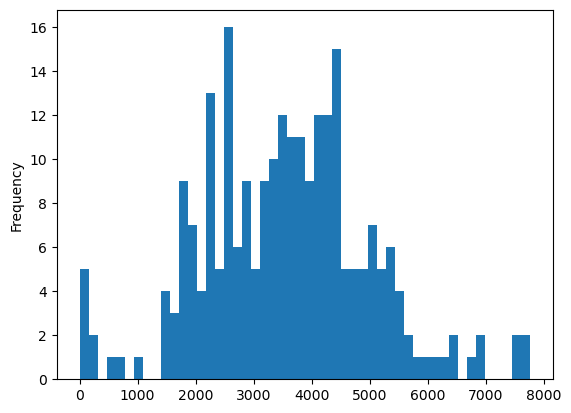

In [64]:
# plot it as a histogram with 50 bins
df2['Total Population'].plot.hist(bins=50)

<AxesSubplot: >

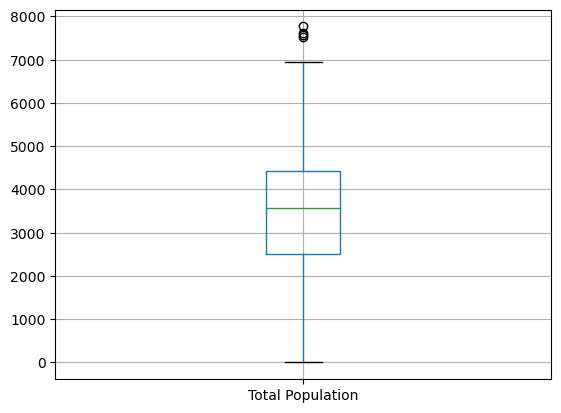

In [65]:
# box plot: notice the different syntax to generate it
# box plots allow us to view outliers
df2.boxplot(column=['Total Population'])

<AxesSubplot: xlabel='Black', ylabel='White'>

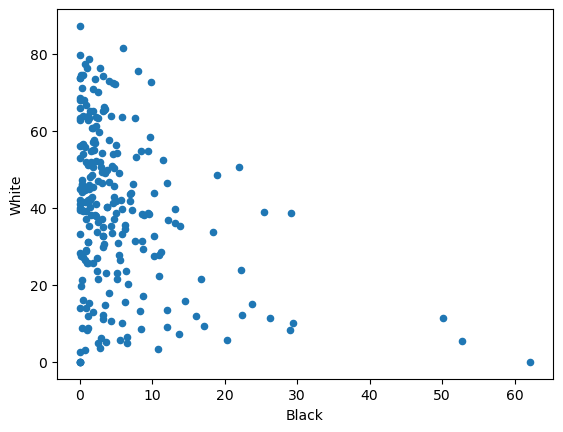

In [66]:
#scatter plot
df2.plot.scatter(x='Black',y='White')

<AxesSubplot: xlabel='FIPS'>

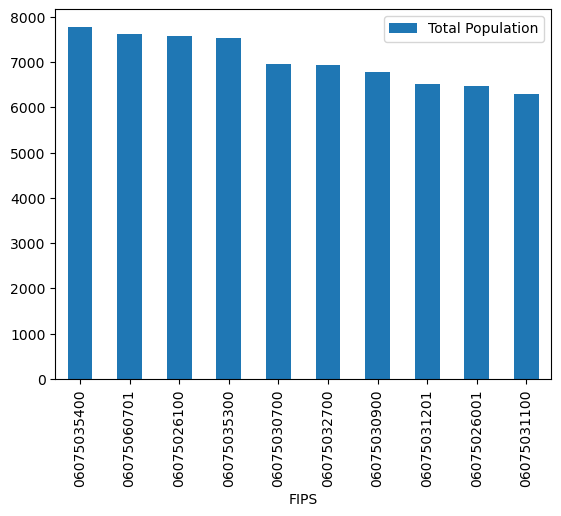

In [67]:
#bar graph
df_sorted = df2.sort_values(by='Total Population',ascending = False)
df_sorted.head(10).plot.bar(x='FIPS',
                            y='Total Population')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in San Francisco in 2021'}, ylabel='FIPS'>

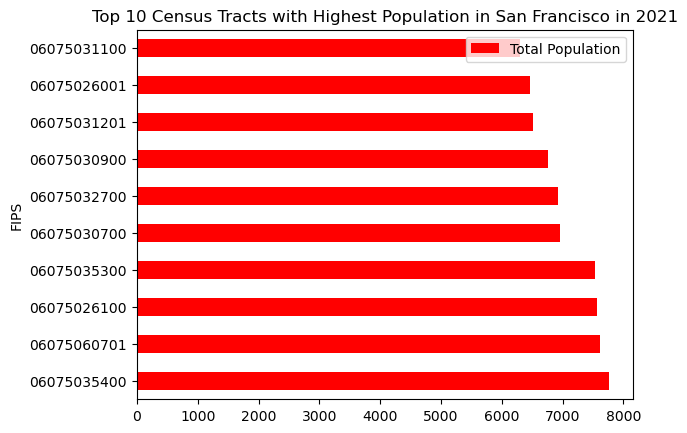

In [68]:
# Make it prettier with a title
df_sorted.head(10).plot.barh(x='FIPS',
                            y='Total Population', 
                            title='Top 10 Census Tracts with Highest Population in San Francisco in 2021',
                            color='red')

## Filtering and subsetting data through Querying

In [69]:
df2[df2['Total Population']==0]

,FIPS,Total Population,Hispanic_or_Latino,Black,Asian,Native_American,Hawaiian_or_Pacific_Islander,White
238,06075980401,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,06075990100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,06075990200,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_no_pop = df2[df2['Total Population']==0]
print('There are ' + str(len(df_no_pop)) + ' census tracts with no people in them')

There are 3 census tracts with no people in them


In [71]:
# display the three tracts with no people in them
df_no_pop[['FIPS','Total Population']]

,FIPS,Total Population
238,06075980401,0.0
242,06075990100,0.0
243,06075990200,0.0


### 5. Maps

In [72]:
tracts=gpd.read_file('Data/2020_SFCensusTract.zip')
tracts.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,date_data_,time_data_,date_dat_2,time_dat_2,geometry
0,06,075,980501,06075980501,9805.01,Census Tract 9805.01,G5020,S,1471536.0,9769.0,+37.7162081,-122.4193463,2022-03-04,00:00:00.000,2021-02-01,00:00:00.000,"POLYGON ((-122.42722 37.71555, -122.42719 37.7..."
1,06,075,017102,06075017102,171.02,Census Tract 171.02,G5020,S,294894.0,0.0,+37.7654353,-122.4504754,2022-03-04,00:00:00.000,2021-02-01,00:00:00.000,"POLYGON ((-122.45321 37.76825, -122.45168 37.7..."
2,06,075,012302,06075012302,123.02,Census Tract 123.02,G5020,S,92653.0,0.0,+37.7870222,-122.4120970,2022-03-04,00:00:00.000,2021-02-01,00:00:00.000,"POLYGON ((-122.41500 37.78745, -122.41335 37.7..."
3,06,075,016801,06075016801,168.01,Census Tract 168.01,G5020,S,226534.0,0.0,+37.7713309,-122.4290133,2022-03-04,00:00:00.000,2021-02-01,00:00:00.000,"POLYGON ((-122.43235 37.77378, -122.43082 37.7..."
4,06,075,011902,06075011902,119.02,Census Tract 119.02,G5020,S,93053.0,0.0,+37.7909959,-122.4098067,2022-03-04,00:00:00.000,2021-02-01,00:00:00.000,"POLYGON ((-122.41246 37.79163, -122.41171 37.7..."


<AxesSubplot: >

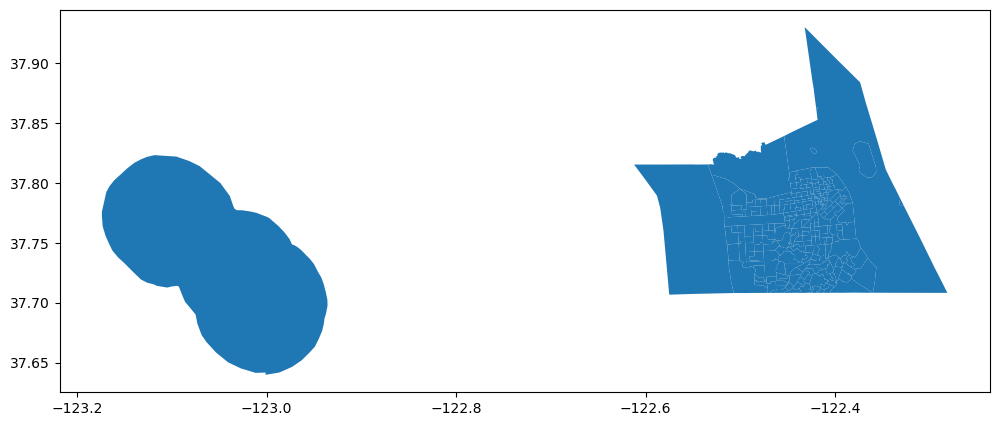

In [73]:
#plot 
tracts.plot(figsize=(12,10))

In [74]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp     244 non-null    object  
 1   countyfp    244 non-null    object  
 2   tractce     244 non-null    object  
 3   geoid       244 non-null    object  
 4   name        244 non-null    object  
 5   namelsad    244 non-null    object  
 6   mtfcc       244 non-null    object  
 7   funcstat    244 non-null    object  
 8   aland       244 non-null    float64 
 9   awater      244 non-null    float64 
 10  intptlat    244 non-null    object  
 11  intptlon    244 non-null    object  
 12  date_data_  244 non-null    object  
 13  time_data_  244 non-null    object  
 14  date_dat_2  244 non-null    object  
 15  time_dat_2  244 non-null    object  
 16  geometry    244 non-null    geometry
dtypes: float64(2), geometry(1), object(14)
memory usage: 32.5+ KB


In [75]:
#keep FIPS column and geometry columns only
tracts_clean = ['geoid',
                'geometry']
tracts_clean = tracts[tracts_clean]
tracts_clean.head()

,geoid,geometry
0,06075980501,"POLYGON ((-122.42722 37.71555, -122.42719 37.7..."
1,06075017102,"POLYGON ((-122.45321 37.76825, -122.45168 37.7..."
2,06075012302,"POLYGON ((-122.41500 37.78745, -122.41335 37.7..."
3,06075016801,"POLYGON ((-122.43235 37.77378, -122.43082 37.7..."
4,06075011902,"POLYGON ((-122.41246 37.79163, -122.41171 37.7..."


In [76]:
columns = list(tracts_clean)
columns

['geoid', 'geometry']

In [77]:
# rename the columns
tracts_clean.columns = ['FIPS', 'geometry']
tracts_clean.head()

,FIPS,geometry
0,06075980501,"POLYGON ((-122.42722 37.71555, -122.42719 37.7..."
1,06075017102,"POLYGON ((-122.45321 37.76825, -122.45168 37.7..."
2,06075012302,"POLYGON ((-122.41500 37.78745, -122.41335 37.7..."
3,06075016801,"POLYGON ((-122.43235 37.77378, -122.43082 37.7..."
4,06075011902,"POLYGON ((-122.41246 37.79163, -122.41171 37.7..."


#### Merging/joining data
In this section, I am finally merging the SF Census Data and the Data SF Census Tract shapefile data.

In [78]:
#creating a new dataframe based on the join 
tracts_race=tracts_clean.merge(df2,on="FIPS")
tracts_race.head()

,FIPS,geometry,Total Population,Hispanic_or_Latino,Black,Asian,Native_American,Hawaiian_or_Pacific_Islander,White
0,06075980501,"POLYGON ((-122.42722 37.71555, -122.42719 37.7...",104.0,0.0,0.0,0.0,100.0,0.0,0.0
1,06075017102,"POLYGON ((-122.45321 37.76825, -122.45168 37.7...",3671.0,15.6,1.8,0.3,6.1,0.0,70.9
2,06075012302,"POLYGON ((-122.41500 37.78745, -122.41335 37.7...",2600.0,14.3,7.1,1.0,26.4,0.2,43.9
3,06075016801,"POLYGON ((-122.43235 37.77378, -122.43082 37.7...",4243.0,12.3,5.0,0.2,18.2,0.0,56.3
4,06075011902,"POLYGON ((-122.41246 37.79163, -122.41171 37.7...",2771.0,7.4,1.6,0.3,33.1,0.5,52.0


### Creating choropleth maps

<AxesSubplot: >

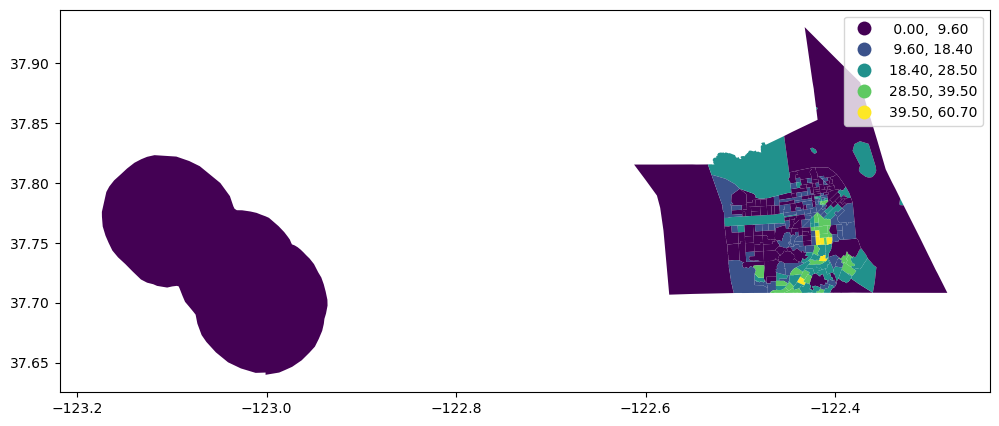

In [79]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic_or_Latino',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

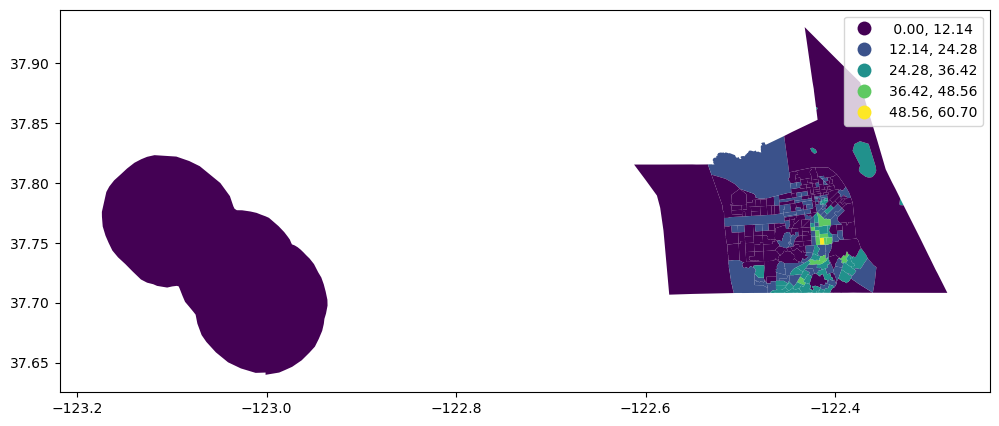

In [80]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic_or_Latino',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

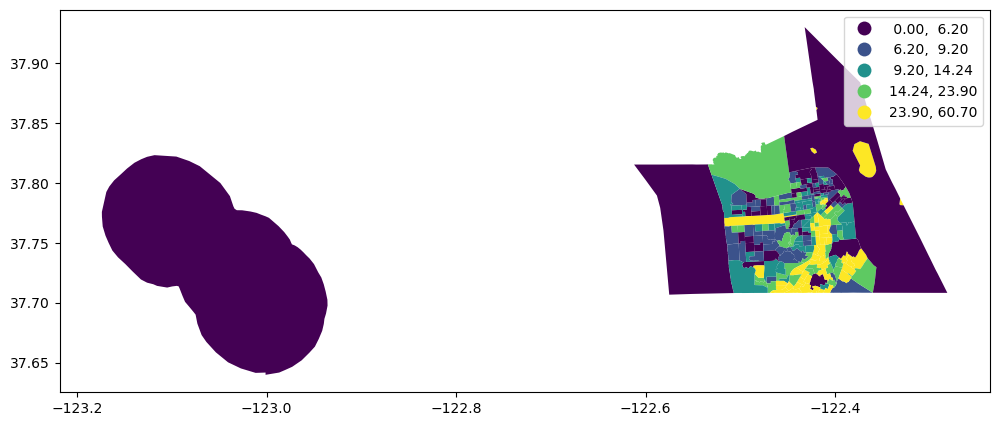

In [81]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic_or_Latino',
                 legend=True, 
                 scheme='quantiles')

### Additional Mapping
What does the majority ethnic cluster look like in SF?

In [82]:
# First, create new columns for percentages
tracts_race['PCT_Black'] = tracts_race['Black']/tracts_race['Total Population']*100
tracts_race['PCT_White'] = tracts_race['White']/tracts_race['Total Population']*100
tracts_race['PCT_Asian'] = tracts_race['Asian']/tracts_race['Total Population']*100

<AxesSubplot: >

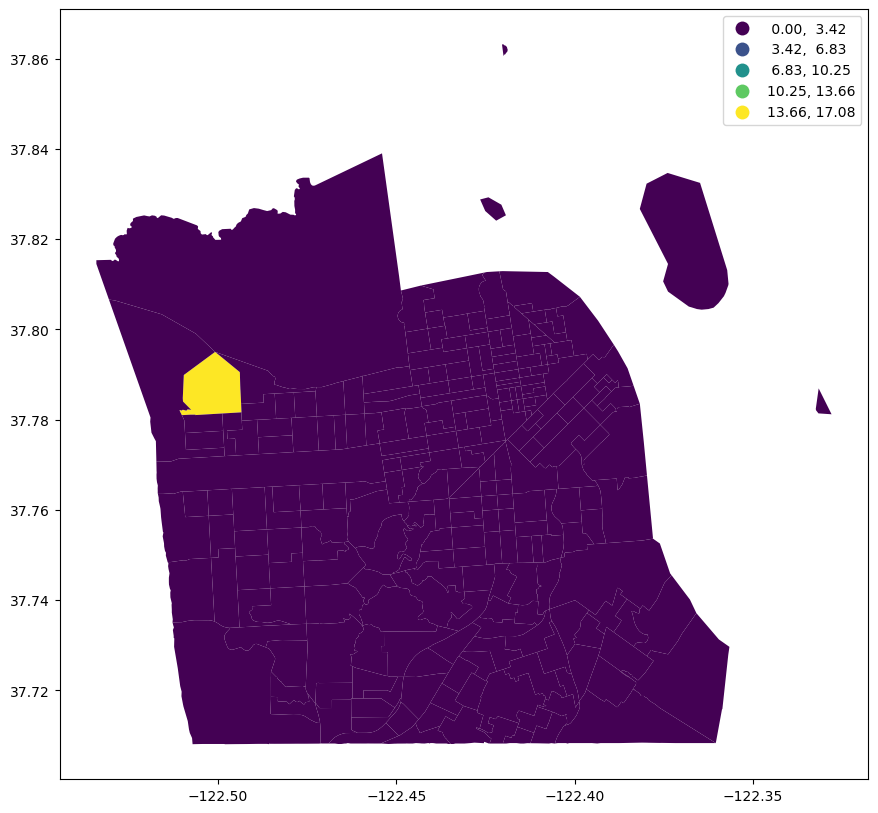

In [83]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Black',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

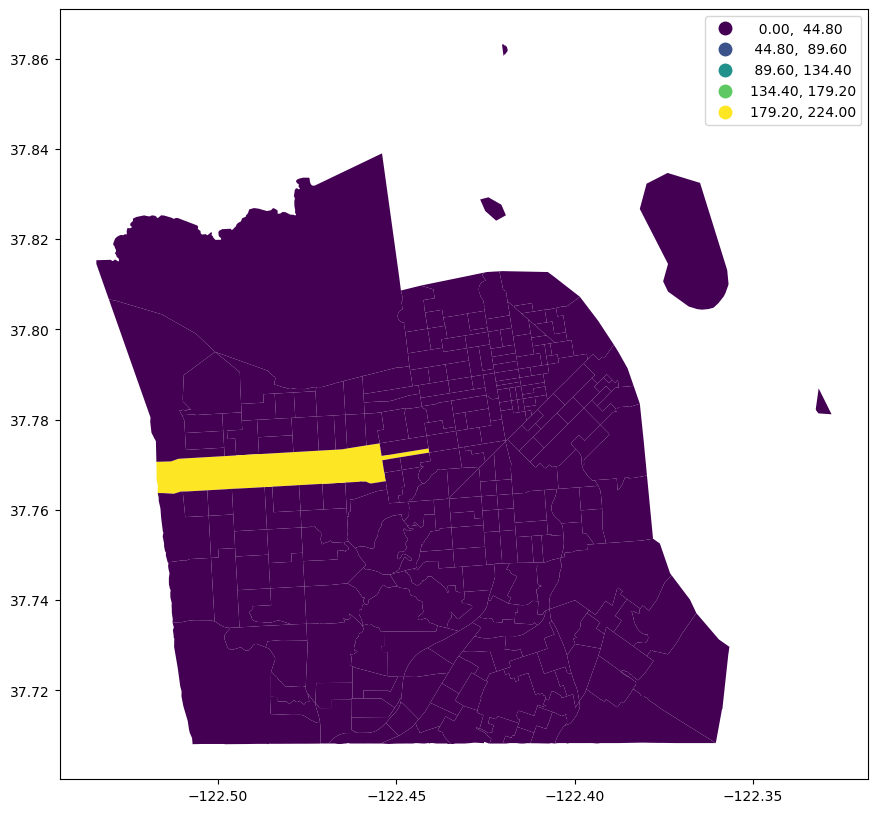

In [84]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_White',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

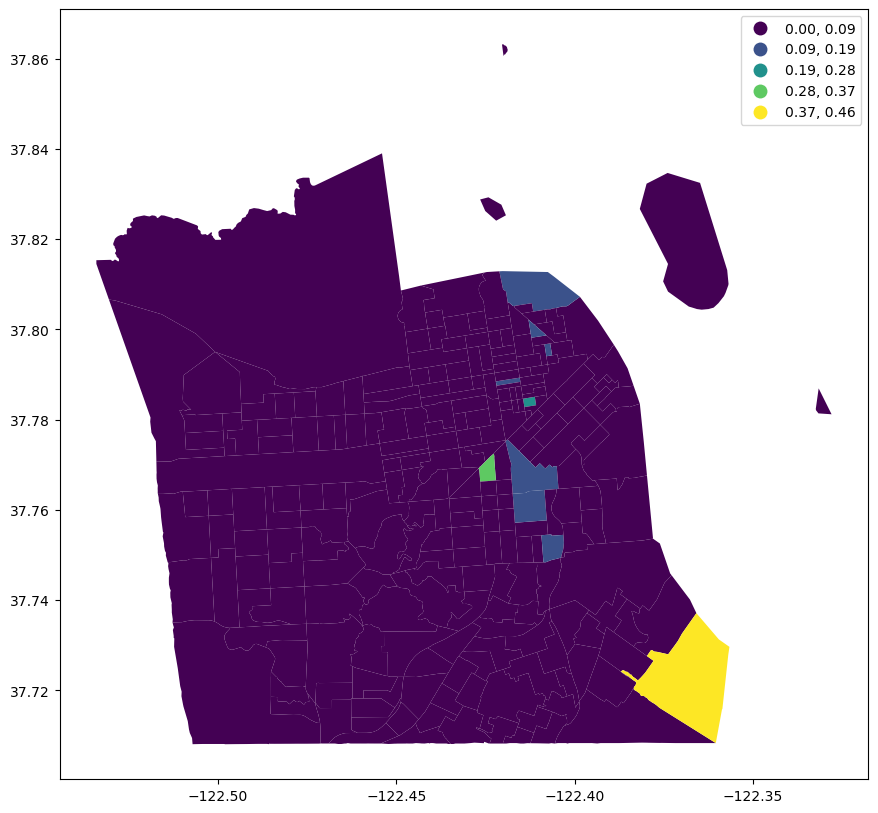

In [85]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Asian',
                 legend=True, 
                 scheme='equal_interval')